# Commands to run
#### <font color="red"> (do NOT run this notebook)</font>

### Some background
#### Target and calibration stars
* **Targets:** 
<p style="text-indent: 20px">Capella - g2<br>
<p style="text-indent: 20px">$\alpha$ Cam - u1<br>
* **Calibrs:** 
<p style="text-indent: 20px">$\gamma$ UMa - a.k.a. BD+54 1475, FK5 447, GC 16268, HD 103287, HIP 58001, HR 4554, PPM 33292, SAO 28179<br>
<p style="text-indent: 20px">$\eta$ Hya - a.k.a. HR3454

#### Helium spectrum (standard)
_Reference: Abramzon & Siegel [2009](http://doi.org/10.1119/1.3086029)_
<img src='../../Jason/Lab2/He_spec.png' width=80%> </img>

---
### Preparations

#### make new directories and  `login.cl` file
_Note: have to manually change the `home`, `imgdir` names, etc._

In [12]:
import os
star_list = ['capella','alpha_cam','gamma_uma','eta_hya']
for name in star_list:
    os.system('mkdir ./new/%s' %name)
    os.system('mkdir ./new/%s/pyraf' %name)

In [13]:
for name in star_list:
    os.system('cp ~/physics100/login.cl ./new/%s/' %name)

#### choosing data

In [14]:
os.system('cp ../2017-05-02_24in/Processed/Processed_Capella_02.fit ./new/capella')
os.system('cp ../2017-05-02_24in/Processed/Processed_Gamma_UMa_03.fit ./new/gamma_uma')

## and the appropriate Helium spectrum
os.system('cp ../2017-05-02_24in/Processed/Processed_Helium1143_01.fit ./new/capella')
os.system('cp ../2017-05-02_24in/Processed/Processed_Helium1143_01.fit ./new/gamma_uma')

#### U1
os.system('cp ../2017-05-03_24in_real/Processed/Processed_U1_alpha_cam_100s.fit ./new/alpha_cam')
os.system('cp ../2017-05-03_24in_real/Processed/Processed_U1_helium_arc.fit ./new/alpha_cam')

os.system('cp ../2017-05-03_24in_real/Processed/Processed_U1_eta_hya_15s.fit ./new/eta_hya')
os.system('cp ../2017-05-03_24in_real/Processed/Processed_U1_helium_arc.fit ./new/eta_hya')

0

### Preliminary calibration
Applying SpecMasterFlat

In [1]:
## Done in the computer lab. The copied 'Processed' fits were calibrated by SpecMasterFlat already

Normalization

In [15]:
import pyfits
import glob

gamma_uma_dir = '/afs/ir.stanford.edu/class/physics100/workdir/g2/Spectra/reduction/new/gamma_uma'
alpha_cam_dir = '/afs/ir.stanford.edu/class/physics100/workdir/g2/Spectra/reduction/new/alpha_cam'
capella_dir   = '/afs/ir.stanford.edu/class/physics100/workdir/g2/Spectra/reduction/new/capella'
eta_hya_dir = '/afs/ir.stanford.edu/class/physics100/workdir/g2/Spectra/reduction/new/eta_hya'

def normalization(diry,name):
    filepath = [f for f in glob.glob(diry+'/*') if name in f]
    star = pyfits.open(filepath[0])
    time = star[0].header['EXPTIME']
    star[0].data = star[0].data/time
    star[0].header['EXPTIME'] = 1.
    star[0].header['EXPOSURE'] = 1.
    star.writeto(diry+'/'+name+'_norm.fits')

In [16]:
normalization(gamma_uma_dir,'Gamma_UMa')
normalization(alpha_cam_dir,'U1_alpha_cam')
normalization(capella_dir,'Capella')
normalization(eta_hya_dir,'U1_eta_hya')

### Reduction : Calibration star

Work in each directory for each star<br>
_From now on, copy and paste the commands to `ipython` prompt_

#### Gamma UMa

<font color="red">change paths/name in `login.cl` first</font>

In [ ]:
## cd ...
## ipython 

In [ ]:
import pyfits
import numpy as np
from pyraf import iraf

In [ ]:
iraf.noao()
iraf.twodspec()
iraf.onedspec()
iraf.longslit()
iraf.apextract()
iraf.longslit.dispaxis=2
iraf.apextract.dispaxis=2

In [ ]:
iraf.apall('Gamma_UMa_norm.fits', interactive='yes')
## then follow handout

In [ ]:
iraf.apall('Processed_Helium1143_01',reference='Gamma_UMa_norm')

In [ ]:
iraf.identify('Processed_Helium1143_01.ms',threshold=0,zwidth=400)

In [ ]:
iraf.hedit('Gamma_UMa_norm.ms.fits',add='yes')
## REFSPEC1
## Processed_Helium1143_01.ms.fits

In [ ]:
iraf.dispcor()
## Gamma_UMa_norm.ms.fits
## Gamma_UMa_dispcor.fits

In [ ]:
iraf.wspectext(header='no')
## Gamma_UMa_dispcor.fits
## Gamma_UMa_dispcor_spec.txt

In [ ]:
iraf.standard(caldir='/afs/ir.stanford.edu/class/physics100/archive/specstandards/')
## Gamma_UMa_dispcor.fits
## 'std'
## 'lick'
## 1.0
## hr4554
## yes

In [ ]:
iraf.sensfunc()
## std
## sens
## yes

In [ ]:
iraf.calibrate()
## Gamma_UMa_dispcor.fits
## Gamma_UMa_final.fits

In [ ]:
iraf.wspectext(header='no')
## Gamma_UMa_final.fits
## Gamma_UMa_final_spec.txt

Now the final spectrum is saved in `Gamma_UMa_final_spec.txt`

In [ ]:
%history -f history.py

#### Eta Hya

<font color="red">change paths/name in `login.cl` first</font>

In [ ]:
## cd ...
## ipython 

In [ ]:
import pyfits
import numpy as np
from pyraf import iraf

In [ ]:
iraf.noao()
iraf.twodspec()
iraf.onedspec()
iraf.longslit()
iraf.apextract()
iraf.longslit.dispaxis=2
iraf.apextract.dispaxis=2

In [ ]:
iraf.apall('U1_eta_hya_norm.fits', interactive='yes')
## yes
## 1
## yes
## yes
## ...

In [ ]:
iraf.apall('Processed_U1_helium_arc',reference='U1_eta_hya_norm')
## no
## no
## no
## no   Watch out for the questions. Might not be exactly the same as in the handout!
## yes
## yes
## yes
## yes

In [ ]:
iraf.identify('Processed_U1_helium_arc.ms')

In [ ]:
iraf.hedit('U1_eta_hya_norm.ms.fits',add='yes')
## REFSPEC1
## Processed_U1_helium_arc.ms.fits

In [ ]:
iraf.dispcor()
## U1_eta_hya_norm.ms.fits
## U1_eta_hya_dispcor.fits

In [ ]:
iraf.wspectext(header='no')
## U1_eta_hya_dispcor.fits
## U1_eta_hya_dispcor_spec.txt

In [ ]:
iraf.standard(caldir='/afs/ir.stanford.edu/class/physics100/archive/specstandards/')
## U1_eta_hya_dispcor.fits
## 'std'
## 'lick'
## 1.0
## hr3454
## yes

In [ ]:
iraf.sensfunc()
## std
## sens
## yes

In [ ]:
iraf.calibrate()
## U1_eta_hya_dispcor.fits
## U1_eta_hya_final.fits

In [ ]:
iraf.wspectext(header='no')
## U1_eta_hya_final.fits
## U1_eta_hya_final_spec.txt

Now the final spectrum is saved in `U1_eta_hya_final_spec.txt`

In [ ]:
%history -f history.py

### Reduction : Science star 1
#### Capella

In [18]:
os.system('cp %s/sens.fits %s/sens.0001.fits' %(gamma_uma_dir,capella_dir))

0

<font color="red">change paths/name in `login.cl` first</font><br>
`cd` to `../capella`, then `ipython`

In [ ]:
import pyfits
import numpy as np
from pyraf import iraf

In [ ]:
iraf.noao()
iraf.twodspec()
iraf.onedspec()
iraf.longslit()
iraf.apextract()
iraf.longslit.dispaxis=2
iraf.apextract.dispaxis=2

In [ ]:
iraf.apall('Capella_norm.fits', interactive='yes')
## yes
## 1
## yes
## yes
## ...

In [ ]:
iraf.apall('Processed_Helium1143_01',reference='Capella_norm')
## no
## no
## no
## no   Watch out for the questions. Might not be exactly the same as in the handout!
## yes
## yes
## yes
## yes

In [ ]:
iraf.identify('Processed_Helium1143_01.ms')

In [ ]:
iraf.hedit('Capella_norm.ms.fits',add='yes')
## REFSPEC1
## Processed_Helium1143_01.ms.fits
## yes

In [ ]:
iraf.dispcor()
## Capella_norm.ms.fits
## Capella_dispcor.fits

In [ ]:
iraf.wspectext(header='no')
## Capella_dispcor.fits
## Capella_dispcor_spec.txt

#### Calibrate

In [ ]:
iraf.imred()
iraf.specred()
iraf.imred.specred.calibrate(sensitivity='sens')
## Capella_dispcor.fits
## Capella_final.fits
## 
## 'lick'
## 1.0

In [ ]:
iraf.wspectext(header='no')
## Capella_final.fits
## Capella_final_spec.txt

Now the final spectrum is saved in `Capella_final_spec.txt`

In [ ]:
%history -f history.py

### Reduction : Science star 2
#### Alpha_Cam

In [20]:
os.system('cp %s/sens.fits %s/sens.0001.fits' %(eta_hya_dir,alpha_cam_dir))

0

<font color="red">change paths/name in `login.cl` first</font><br>
`cd` to `../alpha_cam`, then `ipython`

In [ ]:
import pyfits
import numpy as np
from pyraf import iraf

In [ ]:
iraf.noao()
iraf.twodspec()
iraf.onedspec()
iraf.longslit()
iraf.apextract()
iraf.longslit.dispaxis=2
iraf.apextract.dispaxis=2

In [ ]:
iraf.apall('U1_alpha_cam_norm.fits', interactive='yes')
## yes
## 1
## yes
## yes
## ...

In [ ]:
iraf.apall('Processed_U1_helium_arc',reference='U1_alpha_cam_norm')
## no
## no
## no
## no   Watch out for the questions. Might not be exactly the same as in the handout!
## yes
## yes
## yes
## yes

In [ ]:
iraf.identify('Processed_U1_helium_arc.ms')

In [ ]:
iraf.hedit('U1_alpha_cam_norm.ms.fits',add='yes')
## REFSPEC1
## Processed_U1_helium_arc.ms.fits

In [ ]:
iraf.dispcor()
## U1_alpha_cam_norm.ms.fits
## U1_alpha_cam_dispcor.fits

In [ ]:
iraf.wspectext(header='no')
## U1_alpha_cam_dispcor.fits
## U1_alpha_cam_dispcor_spec.txt

#### Calibrate

In [ ]:
iraf.imred()
iraf.specred()
iraf.imred.specred.calibrate(sensitivity='sens')
## U1_alpha_cam_dispcor.fits
## U1_alpha_cam_final.fits
## 
## 'lick'
## 1.0

In [ ]:
iraf.wspectext(header='no')
## U1_alpha_cam_final.fits
## U1_alpha_cam_final_spec.txt

Now the final spectrum is saved in `U1_alpha_Cam_final_spec.txt`

In [ ]:
%history -f history.py

---
## Processed spectra

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18

In [26]:
capella_spec = pd.read_csv(capella_dir+'/Capella_final_spec.txt',
                           header=None,
                           delim_whitespace=True)
alpha_cam_spec = pd.read_csv(alpha_cam_dir+'/U1_alpha_cam_final_spec.txt',
                             header=None,
                             delim_whitespace=True)
gamma_uma_spec = pd.read_csv(gamma_uma_dir+'/Gamma_UMa_final_spec.txt',
                             header=None,
                             delim_whitespace=True)
eta_hya_spec = pd.read_csv(eta_hya_dir+'/U1_eta_hya_final_spec.txt',
                           header=None,
                           delim_whitespace=True)

In [27]:
capella_wvln = capella_spec[0]
capella_flux = capella_spec[1]

alpha_cam_wvln = alpha_cam_spec[0]
alpha_cam_flux = alpha_cam_spec[1]

gamma_uma_wvln = gamma_uma_spec[0]
gamma_uma_flux = gamma_uma_spec[1]

eta_hya_wvln = eta_hya_spec[0]
eta_hya_flux = eta_hya_spec[1]

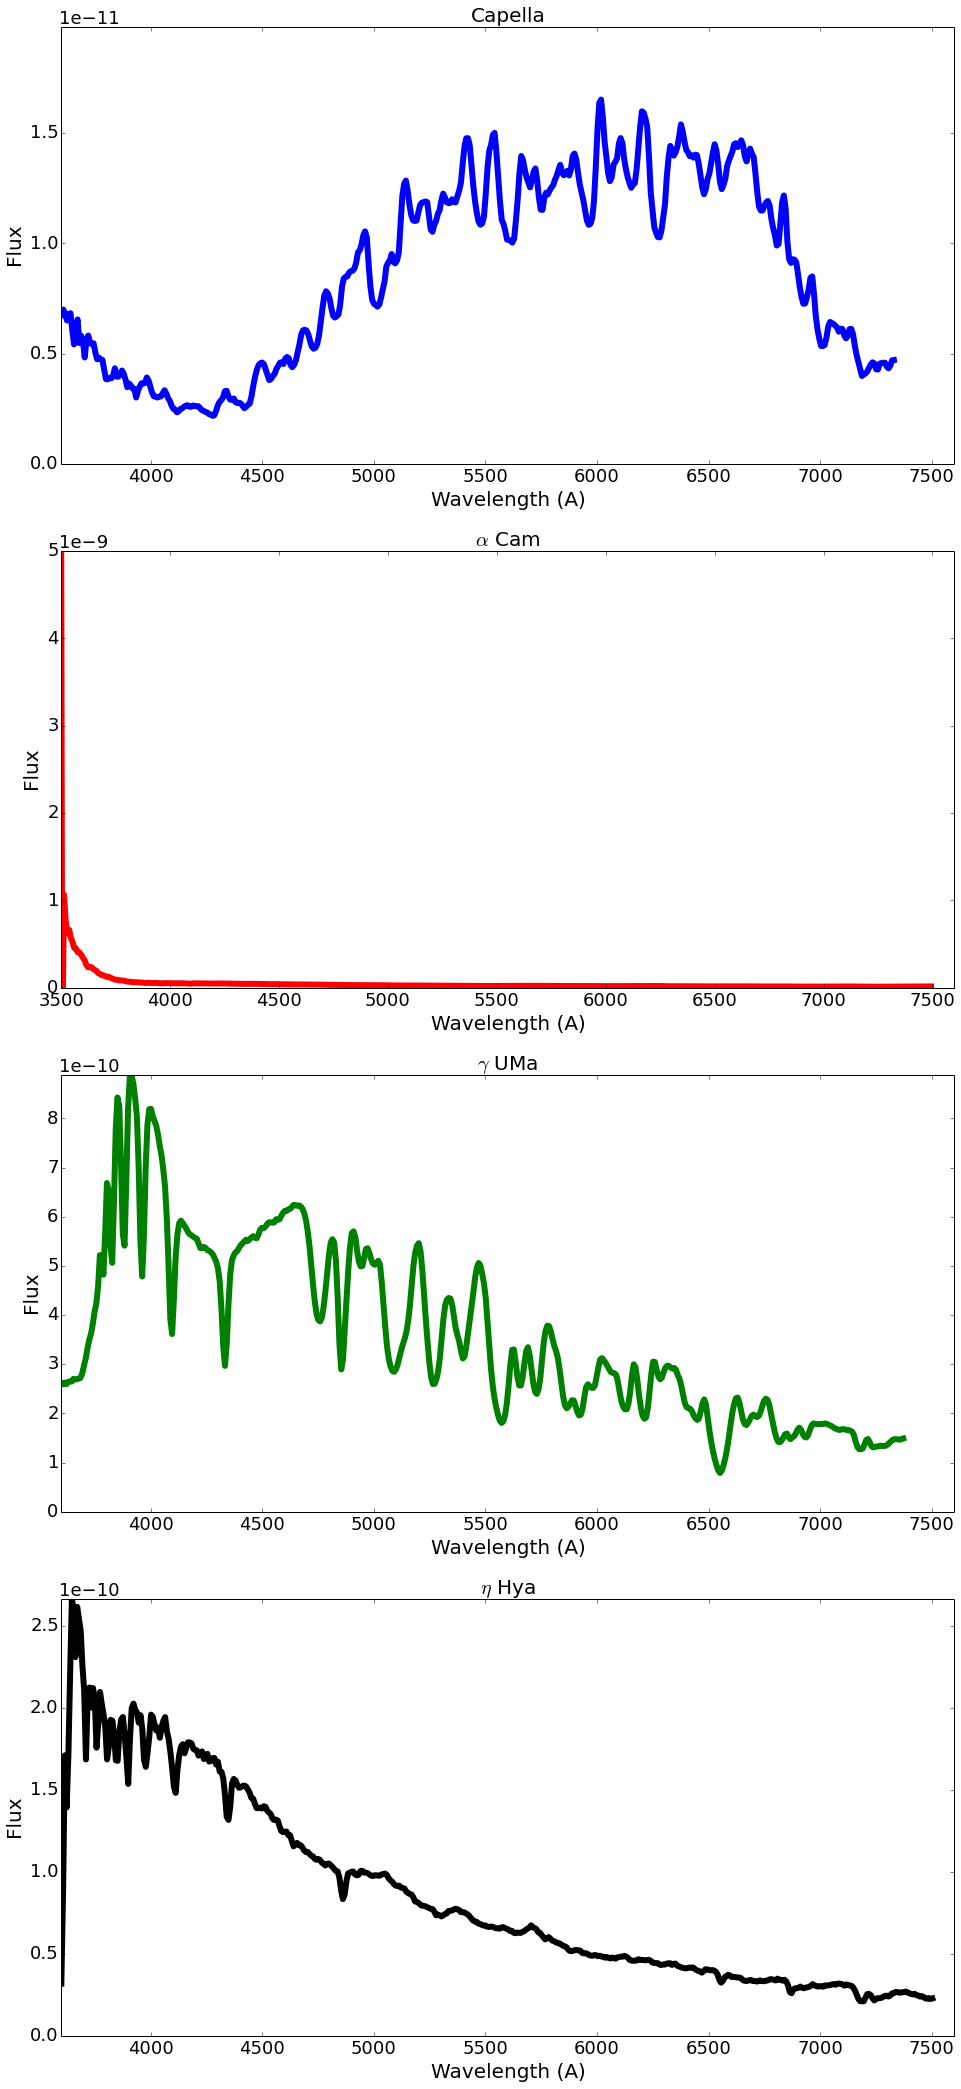

In [44]:
plt.figure(figsize=(16,36))
plt.subplot(411); plt.plot(capella_wvln,capella_flux,lw=6); 
plt.title('Capella'); plt.xlabel('Wavelength (A)'); plt.ylabel('Flux')
plt.xlim(3600,7600); plt.ylim(0,np.max(capella_flux[20:]))
plt.subplot(412); plt.plot(alpha_cam_wvln,alpha_cam_flux,'r',lw=6); 
plt.title(r'$\alpha$ Cam'); plt.xlabel('Wavelength (A)'); plt.ylabel('Flux')
plt.xlim(3500,7600); plt.ylim(0,5e-9)
plt.subplot(413); plt.plot(gamma_uma_wvln,gamma_uma_flux,'g',lw=6); 
plt.title(r'$\gamma$ UMa'); plt.xlabel('Wavelength (A)'); plt.ylabel('Flux')
plt.xlim(3600,7600); plt.ylim(0,np.max(gamma_uma_flux[20:]))
plt.subplot(414); plt.plot(eta_hya_wvln,eta_hya_flux,'k',lw=6); 
plt.title(r'$\eta$ Hya'); plt.xlabel('Wavelength (A)'); plt.ylabel('Flux')
plt.xlim(3600,7600); plt.ylim(0,np.max(eta_hya_flux[20:]))

plt.savefig('spectra.png',dpi=300)